In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("final-project.ipynb")

# Final Project: Cardiovascular Disease: Causes, Treatment, and Prevention

In this project, you will investigate the major causes of death in the world: cardiovascular disease! 

In the last part of this project, you will conduct your own hypothesis testing on our Class Data Set.

### Logistics

**Checkpoint.** For the checkpoint, you must complete the questions up until the end of Part 2, and submit them in Week 10 (see the exact date in Gradescope).

**Deadline.** The full project is due during Finals Week (see the exact date in Gradescope). It's **much** better to be early than late, so start working now.

**Partners.** You may work with one other partner. Only one of you is required to submit the project.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, and `plots`.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')


In the following analysis, we will investigate the world's most dangerous killer: Cardiovascular Disease. Your investigation will take you across decades of medical research, and you'll look at multiple causes and effects across four different studies.

Here is a roadmap for this project:

* In Part 1, we'll investigate the major causes of death in the world during the past century (from 1900 to 2018).
* In Part 2, we'll look at data from the Framingham Heart Study, an observational study into cardiovascular health.
* In Part 3, we'll examine the effect that hormone replacement therapy has on the risk of coronary heart disease using data from the Heart and Estrogen-Progestin Replacement Study.
* In Part 4, we'll explore the effect that the consumption of saturated fats has on cardiovascular death rates using data from the National Heart-Diet Study

## Part 1: Causes of Death 

In order to get a better idea of how we can most effectively prevent deaths, we need to first figure out what the major causes of death are. Run the following cell to read in and view the `causes_of_death` table, which documents the death rate for major causes of deaths over the last century (1900 until 2018).

In [3]:
causes_of_death = Table.read_table('data/causes_of_death.csv')
causes_of_death.show(5)

Year,Cause,Age Adjusted Death Rate
2018,Heart Disease,163.6
2018,Cancer,149.1
2018,Stroke,37.1
2018,Accidents,48
2018,Influenza and Pneumonia,14.9


Each entry in the column **Age Adjusted Death Rate** is a death rate for a specific **Year** and **Cause** of death. 

If we look at unadjusted data, the age distributions of each sample will influence death rates. In an older population, we would expect death rates to be higher for all causes since old age is associated with higher risk of death. To compare death rates without worrying about differences in the demographics of our populations, we adjust the data for age.

The **Age Adjusted** specification in the death rate column tells us that the values shown are the death rates that would have existed if the population under study in a specific year had the same age distribution as the "standard" population, a baseline. 

You aren't responsible for knowing how to do this adjustment, but should understand why we adjust for age and what the consequences of working with unadjusted data would be. 

**Question 1:** What are all the different causes of death in this dataset? Assign an array of all the unique causes of death to `all_unique_causes`.


<!--
BEGIN QUESTION
name: q1_1
manual: false
-->

In [4]:
all_unique_causes = causes_of_death.group('Cause').column('Cause')
sorted(all_unique_causes)

['Accidents', 'Cancer', 'Heart Disease', 'Influenza and Pneumonia', 'Stroke']

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2:** We would like to plot the death rate for each disease over time. To do so, we must create a table with one column for each cause and one row for each year.

Create a table called `causes_for_plotting`. It should have one column called `Year`, and then a column with age-adjusted death rates for each of the causes you found in Question 1. There should be as many of these columns in `causes_for_plotting` as there are causes in Question 1.

*Hint*: Use `pivot`, and think about how the `first` function might be useful in getting the **Age Adjusted Death Rate** for each cause and year combination.

<!--
BEGIN QUESTION
name: q1_2
manual: false
-->

In [6]:
# This function may be useful for Question 2.
def first(x):
    return x.item(0)

In [7]:
causes_for_plotting = causes_of_death.pivot('Cause', 'Year', 'Age Adjusted Death Rate', first)
causes_for_plotting.show(5)

Year,Accidents,Cancer,Heart Disease,Influenza and Pneumonia,Stroke
1900,90.3,114.8,265.4,297.5,244.2
1901,109.3,118.1,272.6,312.9,243.6
1902,93.6,119.7,285.2,219.3,237.8
1903,106.9,125.2,304.5,251.1,244.6
1904,112.8,127.9,331.5,291.2,255.2


Let's take a look at how age-adjusted death rates have changed across different causes over time. Run the cell below to compare Heart Disease (a chronic disease) and Influenza and Pneumonia (infectious diseases).

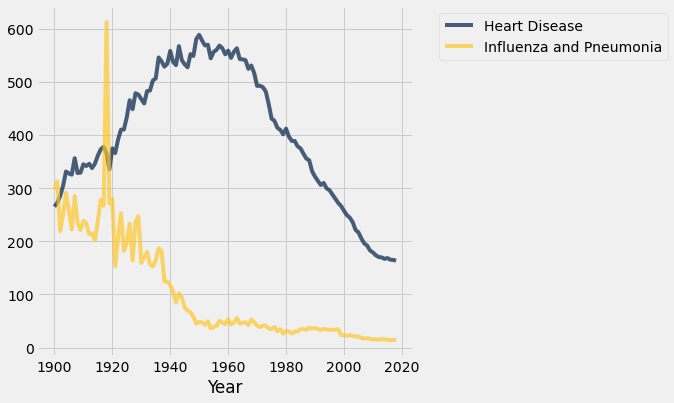

In [8]:
causes_for_plotting.select('Year', "Heart Disease", "Influenza and Pneumonia").plot('Year')

**Question 3:** Beginning in 1900 and continuing until 1950, we observe that death rates for Influenza and Pneumonia decrease while death rates for Heart Disease increase. What might have caused this shift?

Assign `disease_trend_explanation` to an array of integers that correspond to possible explanations for these trends.

1. People are living longer, allowing more time for chronic conditions to develop. 
2. A cure has not been discovered for influenza, so people are still dying at high rates from the flu.
3. Improvements in sanitation, hygiene, and nutrition have reduced the transmission of viruses and bacteria that cause infectious diseases.
4. People are more active, putting them at lower risk for conditions like heart disease and diabetes.
5. Widespread adoption of vaccinations has reduced rates of infectious disease.
6. The medical community has became more aware of chronic conditions, leading to more people being diagnosed with heart disease.

*Hint:* Consider what contributes to the development of these diseases. What decreases the transmission of infections? Why do we see more lifestyle-related conditions like heart disease?

<!--
BEGIN QUESTION
name: q1_3
manual: false
-->

In [9]:
disease_trend_explanation = make_array(1,3,5,6)
disease_trend_explanation

array([1, 3, 5, 6])

In [10]:
grader.check("q1_3")

q1_3 results: All test cases passed!

This phenomenon is known as the epidemiological transition - in developed countries, the severity of infectious disease has decreased, but chronic disease has become more widespread. Coronary heart disease (CHD) is one of the most deadly chronic diseases that has emerged in the past century, and more healthcare resources have been invested to studying it.

Run the cell below to see what a plot of the data would have looked like had you been living in 1950. CHD was the leading cause of death and had killed millions of people without warning. It had become twice as lethal in just a few decades and people didn't understand why this was happening.

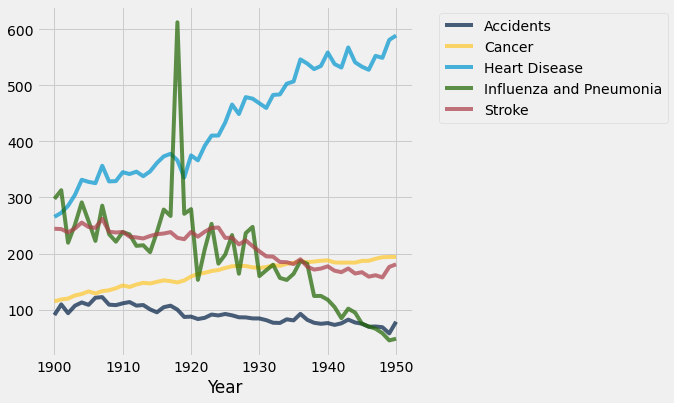

In [11]:
# Do not change this line
causes_for_plotting.where('Year', are.below_or_equal_to(1950)).plot('Year')

The view from 2016 looks a lot less scary, however, since we know it eventually went down. The decline in CHD deaths is one of the greatest public health triumphs of the last half century. That decline represents many millions of saved lives, and it was not inevitable. The Framingham Heart Study, in particular, was the first to discover the associations between heart disease and risk factors like smoking, high cholesterol, high blood pressure, obesity, and lack of exercise.

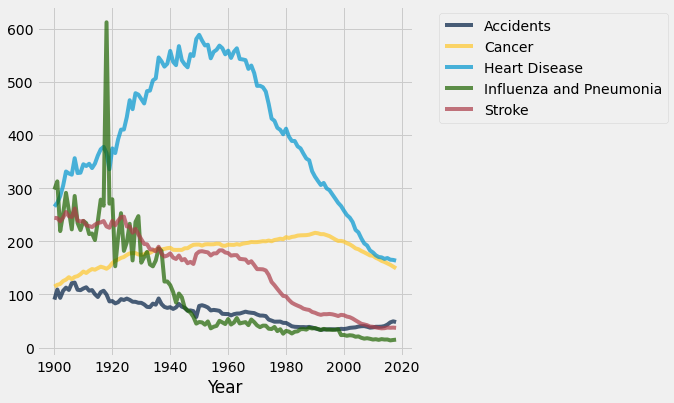

In [12]:
# Do not change this line
causes_for_plotting.plot('Year')

Let's examine the graph above. You'll see that in the 1960s, the death rate due to heart disease steadily declines. Up until then, the effects of smoking, blood pressure, and diet on the cardiovascular system were unknown to researchers. Once these factors started to be noticed, doctors were able recommend a lifestyle change for at-risk patients to prevent heart attacks and heart problems.

Note, however, that the death rate for heart disease is still higher than the death rates of all other causes. Even though the death rate is starkly decreasing, there's still a lot we don't understand about the causes (both direct and indirect) of heart disease.

## Part 2: The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this section, we'll investigate some of the study's key findings about cholesterol and heart disease.

Run the cell below to examine data for 3842 subjects from the first wave of the study, collected in 1956.

In [13]:
framingham = Table.read_table('data/framingham.csv')
framingham

AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
39,106,70,195,0,0,77,0,1
46,121,81,250,0,0,76,0,0
48,127.5,80,245,1,0,70,0,0
61,150,95,225,1,0,103,1,0
46,130,84,285,1,0,85,0,0
43,180,110,228,0,0,99,0,1
63,138,71,205,0,0,85,0,1
45,100,71,313,1,0,78,0,0
52,141.5,89,260,0,0,79,0,0
43,162,107,225,1,0,88,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study - we are excluding subjects who already had heart disease or had missing data.

### Section 1: Diabetes and the Population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the percentage of the population who have it) in the U.S. around this time was 0.93%. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference is due to chance).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study? You should convert prevalence values to proportions before calculating the statistic!
Hint: Refer to textbook section 11.3.3.1. Observed Value of the Test Statistic
<!--
BEGIN QUESTION
name: q2_1_1
manual: false
-->

In [14]:
persons_w_diabetes = framingham.where('DIABETES', 1).num_rows
observed_diabetes_distance = abs((persons_w_diabetes/3842) - .0093)
observed_diabetes_distance

0.01802951587714732

In [15]:
grader.check("q2_1_1")

q2_1_1 results: All test cases passed!

**Question 2**: Define the function `diabetes_statistic` which should return exactly one simulated statistic of the absolute distance between the observed prevalence and the true population prevalence under the null hypothesis. Make sure that your simulated sample is the same size as your original sample.

*Hint:* The array `diabetes_proportions` contains the proportions of the population without and with diabetes, respectively.

*Hint:* Use the function `sample_proportions()` to produce the expected number of diabetic people among all the test subjects. Referece for the function can be found here: https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html
<!--
BEGIN QUESTION
name: q2_1_2
manual: false
-->

In [16]:
diabetes_proportions = make_array(0.9907, 0.0093)

def diabetes_statistic():
    dbt_proportion = sample_proportions(3842, diabetes_proportions).item(1)
    return abs(dbt_proportion - persons_w_diabetes/3842)

In [17]:
grader.check("q2_1_2")

q2_1_2 results: All test cases passed!

**Question 3**:  Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q2_1_3
manual: false
-->

In [18]:
diabetes_simulated_stats = make_array()

for i in np.arange(5000): 
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, diabetes_statistic())
    
diabetes_simulated_stats

array([ 0.01535659,  0.01952108,  0.01587715, ...,  0.01952108,
        0.01431546,  0.01613743])

In [19]:
grader.check("q2_1_3")

q2_1_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4**: Run the following cell to generate a histogram of the simulated values of your statistic, along with the observed value.

*If you're not sure if your histogram is correct, think about how we're generating the sample statistics under the null, and what those statistics will look like*

*Make sure to run the cell that draws the histogram, since it will be graded.*

<!--
BEGIN QUESTION
name: q2_1_4
manual: true
-->

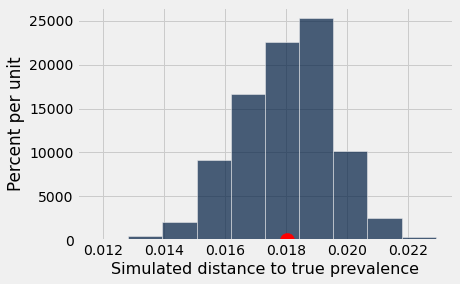

In [20]:
Table().with_column('Simulated distance to true prevalence', diabetes_simulated_stats).hist()
plots.scatter(observed_diabetes_distance, 0, color='red', s=200);

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5**: Based on the historgram above, should you reject the null hypothesis?

<!--
BEGIN QUESTION
name: q2_1_5
manual: true
-->


No, the typical values of the simulated distance to true prevalence are mostly around the observed value of .018. This provides data to support the null hypothesis which states that the probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population.

<!-- END QUESTION -->

**Question 6**: Why might there be a difference between the population and the sample from the Framingham Study? Assuming that all these statements are true - what are possible explanations for the higher diabetes prevalence in the Framingham population?

Assign the name `framingham_diabetes_explanations` to an array of the following explanations that **are consistent** with the trends we observe in the data and our hypothesis test results. 

1. Diabetes was under-diagnosed in the population (i.e., there were a lot of people in the population who had diabetes but weren't diagnosed). By contrast, the Framingham participants were less likely to go undiagnosed because they had regular medical examinations as part of the study.
2. The relatively wealthy population in Framingham ate a luxurious diet high in sugar (high-sugar diets are a known cause of diabetes).
3. The Framingham Study subjects were older on average than the general population, and therefore more likely to have diabetes.

<!--
BEGIN QUESTION
name: q2_1_6
manual: false
-->

In [21]:
framingham_diabetes_explanations = make_array(1, 2, 3)
framingham_diabetes_explanations

array([1, 2, 3])

In [22]:
grader.check("q2_1_6")

q2_1_6 results: All test cases passed!

In real-world studies, getting a truly representative random sample of the population is often incredibly difficult. Even just to accurately represent all Americans, a truly random sample would need to examine people across geographical, socioeconomic, community, and class lines (just to name a few). For a study like this, scientists would also need to make sure the medical exams were standardized and consistent across the different people being examined. In other words, there's a tradeoff between taking a more representative random sample and the cost of collecting more information from each person in the sample.

The Framingham study collected high-quality medical data from its subjects, even if the subjects may not be a perfect representation of the population of all Americans. This is a common issue that data scientists face: while the available data aren't perfect, they're the best we have. The Framingham study is generally considered the best in its class, so we'll continue working with it while keeping its limitations in mind.

(For more on representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the distribution of cholesterol levels among those who get heart disease is the same as the distribution of cholesterol levels
among those who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.

**Question 1:** From the provided Null and Alternative Hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent? We have assigned the variable `ab_reasonable` to `True` since it seems reasonable.

A/B testing is taught in CMPSC 5B, the second class in our Intro to Data Science course series. As a hint, refer to [Ch 12.1 A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html) in the textbook.

In [23]:
ab_reasonable = True 
ab_reasonable

True

<!-- BEGIN QUESTION -->

**Question 2:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint*: Remember that larger values of the test statistic should favor the alternative over the null.

<!--
BEGIN QUESTION
name: q2_2_2
manual: true
-->


I'll compare the two averages of cholestrol levels between those who have heart diseases and those who don't. If levels are close, this will support the null, and if they're farther apart making a bigger difference, it will reject the null.

<!-- END QUESTION -->

**Question 3**: Write a function that computes your test statistic. It should take a table with two columns, `TOTCHOL` (total serum cholesterol) and `ANYCHD` (whether or not the person had coronary heart disease), and compute the test statistic you described above. 

Use the function you defined to compute the observed test statistic, and assign it to the name `framingham_observed_statistic`.

<!--
BEGIN QUESTION
name: q2_2_3
manual: false
-->

In [24]:
def compute_framingham_test_statistic(tbl):
    has_chd = tbl.where('ANYCHD', 1)
    avg_chol_w_chd = np.mean(has_chd.column('TOTCHOL'))
    no_chd = tbl.where('ANYCHD', 0)
    avg_chol_wo_chd = np.mean(no_chd.column('TOTCHOL'))
    return abs(avg_chol_w_chd - avg_chol_wo_chd)
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

In [25]:
grader.check("q2_2_3")

q2_2_3 results: All test cases passed!

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 4**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

<!--
BEGIN QUESTION
name: q2_2_4
manual: false
-->

In [26]:
def simulate_framingham_null():
    shuffled_frame = framingham.sample(with_replacement = False) 
    #we are "shuffling the entire table"
    # this shuffling allows us to disassociate the TOTCHOL cholesterol values with the heart disease            
    # outcomes. this will then allow us to perform A/B testing to see whether or not cholesterol values
    # are correlated or not with heart disease outcomes

    sim_table_frame = framingham.with_column('TOTCHOL', shuffled_frame.column('TOTCHOL')) 
    # adding the"shuffled column TOTCHOL back to the framingham table, and calling it sim_table_frame"

    return compute_framingham_test_statistic(sim_table_frame) 
    # passing the new table into our compute_framingham_test_statistic function, to measure TOTCHOL levels
    
# Run your function once to make sure that it works.
simulate_framingham_null()

2.9658479822528818

In [27]:
grader.check("q2_2_4")

q2_2_4 results: All test cases passed!

**Question 5**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 500 values of the test statistic under the null hypothesis and store the result in the array `framingham_simulated_stats`.

*Hint*: You should use the function you wrote above in Question 4.

*Note*: Warning: running should only take a couple minutes at max!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q2_2_5
manual: false
-->

In [28]:
framingham_simulated_stats = make_array()

for i in np.arange(500):
    framingham_simulated_stats = np.append(framingham_simulated_stats, simulate_framingham_null())

In [29]:
grader.check("q2_2_5")

q2_2_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 6:** The following line will plot the histogram of the simulated test statistics, as well as a point for the observed test statistic. Make sure to run it, as it will be graded. 

<!--
BEGIN QUESTION
name: q2_2_6
manual: true
-->


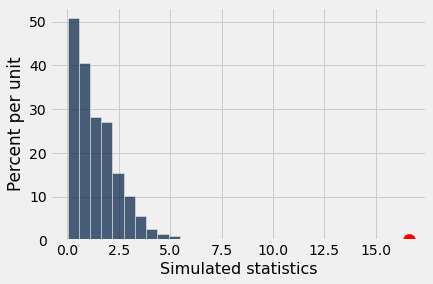

In [30]:
Table().with_column('Simulated statistics', framingham_simulated_stats).hist()
plots.scatter(framingham_observed_statistic, 0, color='red', s=150);

<!-- END QUESTION -->

**Question 7**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint1*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.
*Hint2*: Refer to textbook section 11.4.2. The Chance of an Error

<!--
BEGIN QUESTION
name: q2_2_7
manual: false
-->

In [31]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic)/len(framingham_simulated_stats)
framingham_p_value

0.0

In [32]:
grader.check("q2_2_7")

q2_2_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 8**: Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q2_2_8
manual: true
-->


High cholesterol may be one of the factors of heart disease, but the Framingham Heart Study can't  be used to justify heart disease's causation for all. It doesn't take into account the subjects' lifestyles or genetics, weakening their research. This widens the gap for error in their research, as well as not provide enough support through their observed values of one specific population within America.

<!-- END QUESTION -->



Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

## Checkpoint
#### Congratulations, you have reached finished the first portion of the Final Project! 

Submit this notebook to Final Project (Checkpoint) in Gradescope.

## Part 3: Hormone Replacement Therapy for Cardiovascular Health

### Section 1: The Nurses' Health Study

The Nurses' Health Study (NHS) is another very large observational study which has brought many insights into women's health. It began in 1976 by Dr. Frank Speizer, with questionnaires that were mailed to 121,964 female registered nurses in the United States asking about their medical history, cholesterol and blood pressure, current medications, and so on (one of the benefits of studying nurses is their ability to give reliably accurate answers to these questions). 

The study's initial focus was on investigating the long-term health effects of oral contraceptives, whose use had become much more widespread in the U.S. during the 1960s, but the focus soon expanded to investigating a wide variety of questions on women's health. The NHS continues to this day, tracking its third generation of nurses in the US.

**One of the most consequential early findings from the NHS was about hormone replacement therapy (HRT)**: supplementary estrogen and progesterone for post-menopausal women to relieve side effects of declining hormone levels due to menopause. The NHS found that HRT in postmenopausal women was negatively associated with heart attack risk. In a landmark 1985 paper in the *New England Journal of Medicine* (NEJM), Speizer and his coauthors wrote that
> As compared with the risk in women who had never used postmenopausal hormones, the age-adjusted relative risk of coronary disease in those who had ever used them was 0.5 (95 per cent confidence limits, 0.3 and 0.8; P = 0.007)... These data support the hypothesis that the postmenopausal use of estrogen reduces the risk of severe coronary heart disease. [(Stampfer et al., 1985)](https://www.ncbi.nlm.nih.gov/pubmed/4047106)

**In other words, the authors are saying that women on HRT are half as likely to suffer a heart attack over a certain time period.** We'll define the term "relative risk" later in this section, and we'll also investigate the interpretation of these claims and their statistical basis.

**Question 1** Based on the passage above, which of the following statements can you infer about the Nurses' Health Study? Create an array called `nhs_true_statements` and add integers corresponding to statements you believe are correct (ex: write `nhs_true_statements = make_array(1, 2, 4)` if you think options 1, 2, and 4 are correct)

1. The Nurses' Health Study was a controlled experiment with a control and treatment group.
2. Hormone replacement therapy is most commonly used by young women.
3. The study uses data that was self-reported by nurses for the analysis
4. Since only nurses were included in the study, there's a chance that confounding factors influence our dataset.
5. The study found that estrogen and progesterone use had an association with CHD rates in post-menopausal women.

<!--
BEGIN QUESTION
name: q3_1_1
-->

In [33]:
nhs_true_statements = make_array(3, 4, 5)
nhs_true_statements

array([3, 4, 5])

In [34]:
grader.check("q3_1_1")

q3_1_1 results: All test cases passed!

**The scientists running the NHS wanted to compare post-menopausal women who had taken HRT with post-menopausal women who had never taken HRT, excluding all women who were not post-menopausal or who had previously suffered a heart attack.** This study design complicates the analysis because it creates a variety of reasons why women might drop in and out of the relevant comparison groups.

**Question 2.** Consider the following events which could occur in the middle of the study period (read the above paragraph carefully first): 
0. A woman (who has never had a heart attack) was pre-menopausal at the beginning of the study period becomes post-menopausal in the middle of the study period.
1. A post-menopausal woman survives a heart attack in the middle of the study period (assume the woman is post-menopausal and had never before had a heart attack).
2. A woman dies of cancer in the middle of the study period (assume the woman is post-menopausal and has never had a heart attack).
3. A woman who was not on HRT at the beginning of the study period, and had never before taken HRT, begins taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).
4. A woman who was taking HRT at the beginning of the study period stops taking HRT in the middle of the period (assume the woman is post-menopausal and has never had a heart attack).

For each of the events listed above, answer whether they would result in a woman

- (`E`) entering the study in the middle, 
- (`L`) leaving the study in the middle, 
- (`S`) switching from one comparison group to another in the middle, or 
- (`N`) none of the above 

<!--
BEGIN QUESTION
name: q3_1_2
-->

Assign `event_result` to an array of strings where the *i*th string is a single *capital* letter corresponding to your answer for the *i*th event.

For example, an example answer is `event_result = make_array('N', 'E', 'E', 'L', 'E')` where our answer for event 0 is `N`, our answer for event 1 is `E`, our answer for event 2 is `E`, etc.

In [35]:
event_result = make_array('E', 'L', 'L', 'S', 'S')
event_result

array(['E', 'L', 'L', 'S', 'S'],
      dtype='<U1')

In [36]:
grader.check("q3_1_2")

q3_1_2 results: All test cases passed!

Because women could (and did) drop into and out of the comparison groups in the middle of the study, it is difficult to make a table like we usually would, with one row per participant. In medical studies, individuals are typically weighted by the *amount of time* that they enrolled in the study. A more convenient sampling unit is a **person-month at risk**, which is one month spent by a particular woman in one of the comparison groups, during which she might or might not suffer a heart attack. Here, "at risk" just means the woman is being tracked by the survey in either of the two comparison groups, so that if she had a heart attack it would be counted in our data set.

**Example**: The table below tracks the histories of two hypothetical post-menopausal women in a six-month longitudinal study, who both enter the study in January 1978:
1. Alice has never been on HRT. She has a heart attack in March and is excluded for the remainder of the study period. 
2. Beatrice begins taking HRT for the first time in April and stays healthy throughout the study period.

| Name     | Month    | HRT | Heart Attack   |                                             
|----------|----------|-----|----------------|
| Alice    | Jan 1978 |  0  | 0              |
| Alice    | Feb 1978 |  0  | 0              |
| Alice    | Mar 1978 |  0  | 1              |
| Beatrice | Jan 1978 |  0  | 0              | 
| Beatrice | Feb 1978 |  0  | 0              |
| Beatrice | Mar 1978 |  0  | 0              |
| Beatrice | Apr 1978 |  1  | 0              |
| Beatrice | May 1978 |  1  | 0              |
| Beatrice | Jun 1978 |  1  | 0              |



The probability that a heart attack will happen to a given at-risk person in a given duration of time is called the **hazard rate**. The NHS calculated its effects in terms of the **relative risk**, which is simply the hazard rate for *person-months* in the HRT (Group A) group divided by the hazard rate in the no-HRT (Group B) group.

$$\text{Relative Risk} = \frac{\text{Hazard Rate(Treatment Group)}}{\text{Hazard Rate(Control Group)}}$$


**Question 3.** Complete the following statements, by setting the variable names to the value that correctly fills in the blank.

If the hazard rate of the treatment group is greater than the hazard rate of the control group, the relative risk will be `blank1_1` one. This means that individuals in the treatment group are at `blank1_2` risk of having an heart attack compared to those in the control group.

If the hazard rate of the treatment group is less than the hazard rate of the control group, the relative risk will be `blank2_1` one. This means that individuals in the treatment group are at `blank2_2` risk of having an heart attack compared to those in the control group.

If the hazard rate of the treatment group is equal to the hazard rate of the control group, the relative risk will be `blank3_1` one. This means that individuals in the treatment group are at `blank3_2` risk of having an heart attack compared to those in the control group.

`blank1_1`, `blank2_1`, `blank3_1` should be set to one of the following strings: "less than", "equal to", or "greater than"

`blank1_2`, `blank2_2`, `blank3_2` should be set to one of the following strings:"lower", "equal", or "higher" 

<!--
BEGIN QUESTION
name: q3_1_3
-->

In [37]:
blank1_1 = "greater than"
blank1_2 = "higher"
blank2_1 = "less than"
blank2_2 = "lower"
blank3_1 = "equal to"
blank3_2 = "equal"

In [38]:
grader.check("q3_1_3")

q3_1_3 results: All test cases passed!

Most statistical methods that deal with this type of data assume that we can treat a table like the one above as though it is a sample of independent random draws from a much larger population of person-months at risk in each group. **We will take this assumption for granted throughout the rest of this section.**

Instead of *person-months* at risk, the NHS used *person-years* at risk. It reported 51,478 total person-years at risk in the no-HRT group with 60 heart attacks occurring in total, as well as 54,309 person-years at risk in the HRT group with 30 heart attacks occurring in total. The table NHS below has one row for each person-year at risk. The two columns are 'HRT', recording whether it came from the HRT group (1) or no-HRT group (0), and 'Heart Attack', recording whether the participant had a heart attack that year (1 for yes, 0 for no).

In [39]:
NHS = Table.read_table('data/NHS.csv')
NHS.show(3)

HRT,Heart Attack
0,0
0,0
0,0


Using the NHS data, we can now conduct a hypothesis test to investigate the relationship between HRT and risk of CHD. We'll set up the test as follows:

> **Null Hypothesis:** HRT does not affect the risk of CHD, and the true relative risk is equal to 1. Any deviation is due to random chance

> **Alternative Hypothesis:** HRT decreases the risk of CHD, and the true relative risk is less than 1.

> **Test Statistic:** Relative risk of CHD between post-menopausal women receiving HRT and post-menopausal women not receiving HRT (the definition of relative risk is repeated here for your convenience):

$$\text{Relative Risk} = \frac{\text{Hazard Rate(Treatment Group)}}{\text{Hazard Rate(Control Group)}}$$

*Note: Remember that we assume, under the null, that the two populations are derived from the same much larger population - under this assumption $\text{Hazard Rate(Treatment Group)} = \text{Hazard Rate(Control Group)}$. After simulation, we test this hypothesis by viewing the relative_risk for our simulated samples.*

**Question 4.** Fill in the missing code below to write a function called `relative_risk` that takes in a table with the column labels `HRT` and `Heart Attack`, and computes the sample relative risk as an estimate of the population relative risk. Do *not* round your answer.

<!--
BEGIN QUESTION
name: q3_1_4
-->

In [40]:
def relative_risk(tbl):
    """Return the ratio of the hazard rates (events per person-year) for the two groups"""
    w_HRT = tbl.where('HRT', 1)
    no_HRT = tbl.where('HRT', 0)
    w_HRT_HA = w_HRT.where('Heart Attack', 1).num_rows
    no_HRT_HA = no_HRT.where('Heart Attack', 1).num_rows
    HRT_HR = w_HRT_HA/w_HRT.num_rows
    no_HRT_HR = no_HRT_HA/no_HRT.num_rows
    return HRT_HR/no_HRT_HR
    
relative_risk(NHS)

0.47393618000699694

In [41]:
grader.check("q3_1_4")

q3_1_4 results: All test cases passed!

**Question 5.** Fill in the function `one_sample_rr` so that it generates one  sample and computes the relative risk. Assign `sample_rrs` to 10 (yes, only 10; the code is slow!) estimates of the population relative risk.

*Note:* The cell may take a few seconds to run.

<!--
BEGIN QUESTION
name: q3_1_5
-->

In [42]:
def one_sample_rr():
    return relative_risk(NHS.sample())

sample_rrs = make_array()
for i in np.arange(10):
    new_sample_rr = one_sample_rr()
    sample_rrs = np.append(sample_rrs, new_sample_rr)

In [43]:
grader.check("q3_1_5")

q3_1_5 results: All test cases passed!

The following questions in the rest of Section 3, part 1 are filled in for you to help you get a picture of what's coming up next in CMPSC 5B. We learn about bootstrapping (or sampling with replacement) and confidence intervals later on in the textbook.

**Question 6.** The file `bootstrap_rrs.csv` contains a one-column table with 2001 saved bootstrapped (or sampled with replacement) relative risks. We use these bootstrapped values to compute a 95% confidence interval, storing the left endpoint as `ci_left` and the right endpoint as `ci_right`. 

Note that our method isn't exactly the same as the method employed by the study authors to get their confidence interval.


In [44]:
bootstrap_rrs_from_tbl = Table.read_table('data/bootstrap_rrs.csv').column(0)
ci_left = percentile(2.5, bootstrap_rrs_from_tbl) 
ci_right = percentile(97.5, bootstrap_rrs_from_tbl) 

print("Middle 95% of bootstrappped relative risks: [{:f}, {:f}]".format(ci_left, ci_right))

Middle 95% of bootstrappped relative risks: [0.295930, 0.730383]


The code below plots the confidence interval on top of the bootstrap histogram.

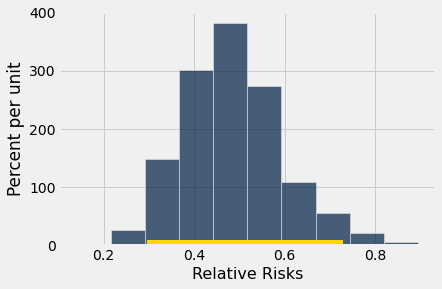

In [45]:
# Just run this cell
Table().with_column("Relative Risks", bootstrap_rrs_from_tbl).hist()
plots.plot([ci_left, ci_right], [.05,.05], color="gold");

**Question 7.** The abstract of the original paper gives a 95% confidence interval of [0.3, 0.8] for the relative risk. Which of the following statements can be justified based on that confidence interval? 

1. There is a 95% chance the relative risk is between 0.3 and 0.8.
2. If we used a P-value cutoff of 5%, we would reject the null hypothesis that HRT does not affect the risk of CHD.
3. If we redo the procedure that generated the interval [0.3, 0.8] on a fresh sample of the same size, there is a 95% chance it will include the true relative risk.
4. There is between a 30% and 80% chance that any woman will suffer a heart attack during the study period.

Assign `ci_statements` to a list of number(s) corresponding to the correct answer(s).

In [46]:
ci_statements = make_array(2, 3)

**Question 8.** What can you conclude from this test? Was hormone replacement therapy associated with an increased or decreased risk of heart attacks? Can we say that HRT caused an change in the risk of heart attacks? Explain your reasoning in 2-4 sentences.

**A POSSIBLE SOLUTION:** The results of the study suggest that hormone replacement therapy is associated with an decreased risk of heart attacks, since the confidence interval only includes values that are less than 1. Since the Nurses' Health Study was an observational study, we can not say anything about the casual relationship between HRD and CHD.

Partly as a result of evidence from the NHS and other observational studies that drew similar conclusions, HRT drugs became a very popular preventive treatment for doctors to prescribe to post-menopausal woman. Even though there were known or suspected risks to the treatment (such as increasing the risk of invasive breast cancer), it was thought that the reduction in heart disease risk was well worth it.

### Section 2: The Heart and Estrogen-Progestin Replacement Study

The Heart and Estrogen-Progestin Replacement Study (HERS) was a large randomized controlled trial carried out by the Women's Health Initiative, which sought to verify whether HRT drugs were as effective as the observational studies seemed to suggest. 2,763 women with a history of heart disease were selected and randomly assigned to receive the treatment (daily estrogen pills) or a placebo pill that looked identical to the treatment. Of the 2763 women participating, 1380 were assigned to the treatment condition and 1383 to the control. They were followed for an average of three years and the number of heart attacks in the two groups was compared.

The main results table from the HERS study [Hulley et al. (1998)](https://jamanetwork.com/journals/jama/fullarticle/187879) is reproduced here:

<img src="data/HERS-table.png" width=500>

For this study, we constructed our own table from scratch based on the results given above. The results are contained in the table `HERS` that has one row for each woman in the trial and two columns: `HRT`, which is 1 if she was assigned to treatment and 0 otherwise, and `CHD`, which is 1 if she suffered a Primary CHD (Coronary Heart Disease) event and 0 otherwise.

Run the cell below to view the results from the HERS study.

In [47]:
num_control = 1383 
num_treatment = 1380

num_control_chd = 176
num_treatment_chd = 172

hrt = np.append(np.zeros(num_control), np.ones(num_treatment))
chd_control = np.append(np.zeros(num_control - num_control_chd), np.ones(num_control_chd))
chd_treatment = np.append(np.zeros(num_treatment - num_treatment_chd), np.ones(num_treatment_chd))
chd = np.append(chd_control, chd_treatment)

HERS = Table().with_columns('HRT', hrt, 'CHD', chd)
HERS.show(3)

HRT,CHD
0,0
0,0
0,0


**Question 1.** We would like to test the null hypothesis that the treatment (HRT) has no effect on the outcome (CHD), against the alternative hypothesis that the treatment does have an effect. What would be a good test statistic? 

Assign `good_ts` to an array of number(s) corresponding to the correct answer(s). Keep in mind that this was the first clinical trial to be done on this subject; as a result, it was not clear at the time whether any effect would be positive or negative.


1. The absolute difference between 1 and the relative risk.
2. The average CHD rate for the treatment group.
3. 10 times the absolute difference between the control and treatment groups' average CHD rates.

<!--
BEGIN QUESTION
name: q3_2_1
-->

In [48]:
good_ts = make_array(1)

In [49]:
grader.check("q3_2_1")

q3_2_1 results: All test cases passed!

**Question 2.** We'll use distance (absolute difference) between average CHD rates as our test statistic. 

Write a function called `hers_test_statistic` to calculate this test statistic on a table with columns `HRT` and `CHD`. Use this function to calculate the observed test statistic, and assign it to `observed_HERS_test_statistic`.

Think about what values of the test statistic support the null versus the alternative hypothesis. You'll use this information to compute the p-value later in this section.
<!--
BEGIN QUESTION
name: q3_2_2
-->

In [50]:
def HERS_test_statistic(tbl):
    """Test statistic: Distance between the average responses"""
    treatment = tbl.where('HRT', 1)
    control = tbl.where('HRT', 0)
    treatment_CHD = treatment.where('CHD', 1).num_rows
    control_CHD = control.where('CHD', 1).num_rows
    treatment_rate = treatment_CHD/treatment.num_rows
    control_rate = control_CHD/control.num_rows
    averages = abs(treatment_rate - control_rate)
    return averages

observed_HERS_test_statistic = HERS_test_statistic(HERS)
observed_HERS_test_statistic

0.0026218994624162967

In [51]:
grader.check("q3_2_2")

q3_2_2 results: All test cases passed!

**Question 3.** A function below is called `simulate_one_HERS_statistic`, which simulates one value of the test statistic under the null hypothesis. We use a method involving shuffling the labels `HRT`, which is mentioned later on in [Ch 12.1 A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html). We learn more about A/B Testing and shuffling labels in CMPSC 5B. It is filled in here for you since we have not covered that yet in our class.

We have covered iteration and for loops though! We want you to use the function to repeatedly sample the null hypothesis 1000 times and compute the test statistic each time. The cell may take a few seconds to run.

<!--
BEGIN QUESTION
name: q3_2_3
-->

In [52]:
def simulate_one_HERS_statistic():
    shuffled_labels = HERS.sample(with_replacement = False).column('HRT')
    shuffled_table = Table().with_columns('HRT', shuffled_labels, 'CHD', HERS.column('CHD'))
    return HERS_test_statistic(shuffled_table)
HERS_test_statistics = make_array()
for i in np.arange(1000):
    new_HERS_statistic = simulate_one_HERS_statistic()
    HERS_test_statistics = np.append(HERS_test_statistics, new_HERS_statistic)

In [53]:
grader.check("q3_2_3")

q3_2_3 results: All test cases passed!

The code below generates a histogram of the simulated test statistics along with your test statistic:

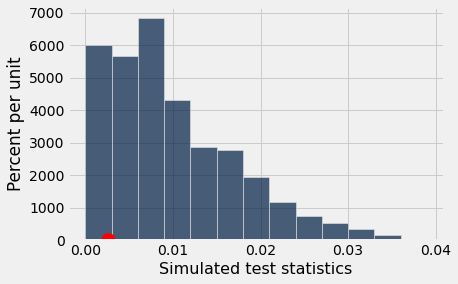

In [54]:
Table().with_column('Simulated test statistics', HERS_test_statistics).hist(bins=np.arange(0,.04,.003))
plots.scatter(HERS_test_statistic(HERS), 0, color='red', s=200);

**Question 4.** Compute the P-value for your hypothesis test and assign it to `HERS_pval`. 

<!--
BEGIN QUESTION
name: q3_2_4
-->

In [55]:
HERS_pval = np.count_nonzero(HERS_test_statistics >= 0.0026218994624162967)/len(HERS_test_statistics)
HERS_pval

0.861

In [56]:
grader.check("q3_2_4")

q3_2_4 results: All test cases passed!

The Heart and Estrogen-Progestin Replacement Study found that HRT did not have a significant impact on a woman's risk of CHD.


<!-- BEGIN QUESTION -->

**Question 5:** If women who choose to take hormones are healthier to begin with than women who choose not to, why might that systematically bias the results of observational studies? Would we expect observational studies to overestimate or underestimate the protective effect of HRT?

<!--
BEGIN QUESTION
name: q3_2_5
manual: true
-->

Those taking preventative measures may systematically bias the results of observational studies, because those subjects who are healthy and take HRT are likely to show different symptoms than those who are unhealthy and don't take HRT. This would cause observational studies to overestimate the protective effect of HRT. 

<!-- END QUESTION -->



### Further reading

If you're interested in learning more, you can check out these articles:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)
* [NYT article on the Nurses' Health Study and the HERS study](https://www.nytimes.com/2003/04/22/science/hormone-studies-what-went-wrong.html)

## Part 4: Class Data Set

We generated our own class data set at the start of the quarter. We collected information, such as area code, mode of transportation, commute time, and number of siblings. Take a look at our class data set and see what insights you can discover about our Spring 2022 class of CMPSC 5A. 


What can you determine about the students in our class this quarter? 

Please note that this entire section is manually graded and no grader checks will be provided. Because of this, you are encouraged to check in with your TAs and ULAs in discussion section and tutoring hours to make sure you're on the right track.

In [57]:
class_data = Table.read_table('data/cmpsc5a-classdata-s22.csv')
class_data

1. What is the area code of your phone number?,2. What is your major?,"3. What is your height in inches? (e.g., 5'6"" = 66 inches)",4. How often have you eaten out this week?,"5. Are you left-handed, right-handed or both?",6. How many siblings do you have?,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc)",8. How many hours of exercise do you get in a typical week?,9. How many pets do you have?,10. How many hours of television or media do you watch in a typical week?,11. Make up a very random 4-digit number:,12. Which award would you rather win:,13. Do you have a tattoo?,14. How many hours of sleep do you get in a typical day?,15. What is your favorite color?,16. Coffee or bagel?,17. Have you ever tie-dyed?,18. How many minutes does it usually take you to commute to school or work?,19. How do you get to work or school?,21. How many words a minute can you type?,22. How many people do you follow on Instagram?,23. How many social media accounts do you have?,24. What is your favorite social media platform?,25. How many hours of household chores do you do in a typical week?,26. Do you know how to write in cursive?
626,Economics,69,2,Right-handed,2,3,7,0,5,3579,Nobel Prize,No,7,red,Coffee,No,0,walk,80,169,5,Tik Tok,2,Yes
559,English,64,1,Right-handed,5,6,3,0,1,6494,Olympic Medal,No,7,pink,Bagel,Yes,15,bus,64,534,8,TikTok,2,Yes
909,Geography,65,2,Right-handed,3,3,7,4,10,2401,Pultizer Prize,No,6,Blue,Coffee,Yes,20,bus,59,241,6,Twitter,4,No
818,History,70,4,Right-handed,1,1,14,2,nan,1649,Olympic Medal,No,5,blue,Coffee,No,20,walk,47,197,3,snapchat,2,Yes
858,Flute Performance,68,3,Right-handed,2,3,3,3,6,1250,Nobel Prize,No,7,Blue,Bagel,Yes,5,bike,100,2000,4,twitter,5,Yes
757,Economics,65,1,Right-handed,1,2,5,0,1,9021,Nobel Prize,Yes,8,blue,Coffee,Yes,5,bike,79,760,3,YouTube,2,Yes
619,Psychological and Brain Sciences,71,1,Right-handed,1,2,5,0,10,7892,Olympic Medal,No,7,red,Coffee,Yes,10,bike,30,200,4,TikTok,3,Yes
415,Economics,68,1,Right-handed,1,2,14,0,28,4342,Nobel Prize,No,7,red,Coffee,No,20,walk,60,0,0,none,3,No
626,statistics and data science,66,7,Right-handed,1,2,2,0,8,2003,Nobel Prize,No,8,black,Bagel,Yes,30,walk,100,400,11,tiktok,1,Yes
310,pbs,69,4,Right-handed,3,3,6,1,8,1591,Academy Award,No,6,Blue,Coffee,Yes,20,walk,80,200,3,idk,5,Yes


<!-- BEGIN QUESTION -->

**Question 1:** First, let's clean up our column headings. Relabel all the column headings so that they're easier to read and reference. 

Hint: refer to lec-notebooks/week5-lec10-groups.ipynb

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->

In [58]:
class_cleaned = Table.read_table('data/cleaned_class_data.csv')
class_cleaned

Area Code,Major,Height,Eatout Count,Hand Dominance,Sibling Count,Birth Order,Exercise Hours,Pet Count,Media hrs/week,Random 4-Digits,Award Preference,Tattoo?,Sleep Hours,Favorite Color,Coffee/Bagel,Tie-Dye Experience,Commute Time,Transportation,WPM,Instagram Following,Social Media Accounts,Favorite Social Media Platform,Chore hrs/week,Cursive?
626,Economics,69,2,Right-handed,2,3,7,0,5,3579,Nobel Prize,No,7,red,Coffee,No,0,walk,80,169,5,TikTok,2,Yes
559,English,64,1,Right-handed,5,6,3,0,1,6494,Olympic Medal,No,7,pink,Bagel,Yes,15,bus,64,534,8,TikTok,2,Yes
909,Geography,65,2,Right-handed,3,3,7,4,10,2401,Pultizer Prize,No,6,Blue,Coffee,Yes,20,bus,59,241,6,Twitter,4,No
818,History,70,4,Right-handed,1,1,14,2,nan,1649,Olympic Medal,No,5,blue,Coffee,No,20,walk,47,197,3,Snapchat,2,Yes
858,Flute Performance,68,3,Right-handed,2,3,3,3,6,1250,Nobel Prize,No,7,Blue,Bagel,Yes,5,bike,100,2000,4,Twitter,5,Yes
757,Economics,65,1,Right-handed,1,2,5,0,1,9021,Nobel Prize,Yes,8,blue,Coffee,Yes,5,bike,79,760,3,YouTube,2,Yes
619,Psychological and Brain Sciences,71,1,Right-handed,1,2,5,0,10,7892,Olympic Medal,No,7,red,Coffee,Yes,10,bike,30,200,4,TikTok,3,Yes
415,Economics,68,1,Right-handed,1,2,14,0,28,4342,Nobel Prize,No,7,red,Coffee,No,20,walk,60,0,0,None,3,No
626,Statistics and Data Science,66,7,Right-handed,1,2,2,0,8,2003,Nobel Prize,No,8,black,Bagel,Yes,30,walk,100,400,11,TikTok,1,Yes
310,Psychological and Brain Sciences,69,4,Right-handed,3,3,6,1,8,1591,Academy Award,No,6,Blue,Coffee,Yes,20,walk,80,200,3,None,5,Yes


<!-- END QUESTION -->

### The Data

<!-- BEGIN QUESTION -->

**Question 2:** Now let's check out a few categorical variables you are interested in. Choose one categorical variable to focus on below. Include relevant summary statistic(s), such as the proportion of students who answered one way or the other,  and a  visualization (a bar chart would be fine). What does this tell you about UCSB students who are taking CMPSC 5A this quarter?


<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

<!-- END QUESTION -->



Include in your answer: a categorical variable you chose and briefly describe why


Also include in your answer: a visualization of the categorical variable



Finally, describe what this tells you about UCSB students who are taking CMPSC 5A this quarter:


I'll be focusing on whether students prefer a bagel or coffee to see if more people prefer coffee or a bagel, or if they are preferred equally. This will tell us which form of fuel the students prefer.

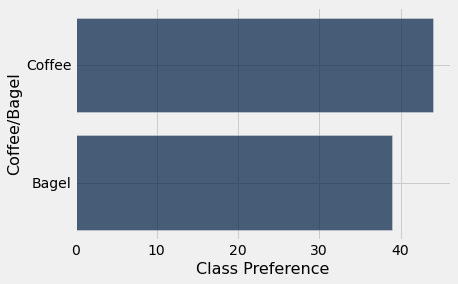

In [59]:
coffee = class_cleaned.where('Coffee/Bagel', 'Coffee').num_rows
bagel = class_cleaned.where('Coffee/Bagel', 'Bagel').num_rows
coffee_bagel_table = Table().with_columns('Coffee/Bagel', make_array('Coffee', 'Bagel'),
                                         'Class Preference', make_array(coffee, bagel))
coffee_bagel_table.barh('Coffee/Bagel', 'Class Preference')
#This data tells us that more students in CMPSC5A at UCSB during Spring22 prefers coffee over a bagel.

<!-- BEGIN QUESTION -->

**Question 3:** Now let's look at one Quantitative Variable. Choose a quantitative variable to describe below. Include relevant summary statistic(s) and a visualization. What does this tell you about UCSB students who are taking CMPSC 5A this quarter? 

<!--
BEGIN QUESTION
name: q4_3
manual: true
-->

I'll be choosing sibling count to analyze in this statistic to measure what the most typical sibling count is. This will tell us the average amount of siblings within the CMPSC 5A population at UCSB. 

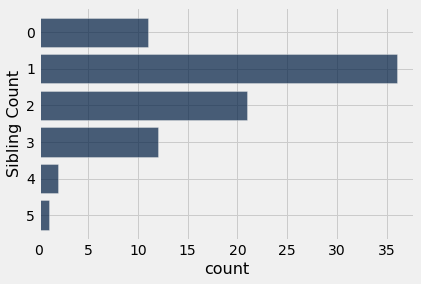

In [60]:
sibling_count_table = Table().with_columns('Student', np.arange(1, 84, 1),
                                           'Sibling Count', class_cleaned.column('Sibling Count'))
sibling_group = sibling_count_table.group('Sibling Count')
sibling_group.barh('Sibling Count')

In [61]:
sibling_group.row(1).item('count')/sum(sibling_group.column('count'))

0.43373493975903615

In [62]:
#This statistic tells us that over 40% of the students in CMPSC5A have 1 sibling.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4:** Now let’s look at One Quantitative and One Categorical Variable. Choose one quantitative and one categorical variable to describe below. Include relevant  summary statistic(s) and a visualization. What does this tell you about UCSB students who are taking CMPSC 5A this quarter?

<!--
BEGIN QUESTION
name: q4_4
manual: true
-->

I'll be analyzing the total average of sleep hours for students in each particular major 

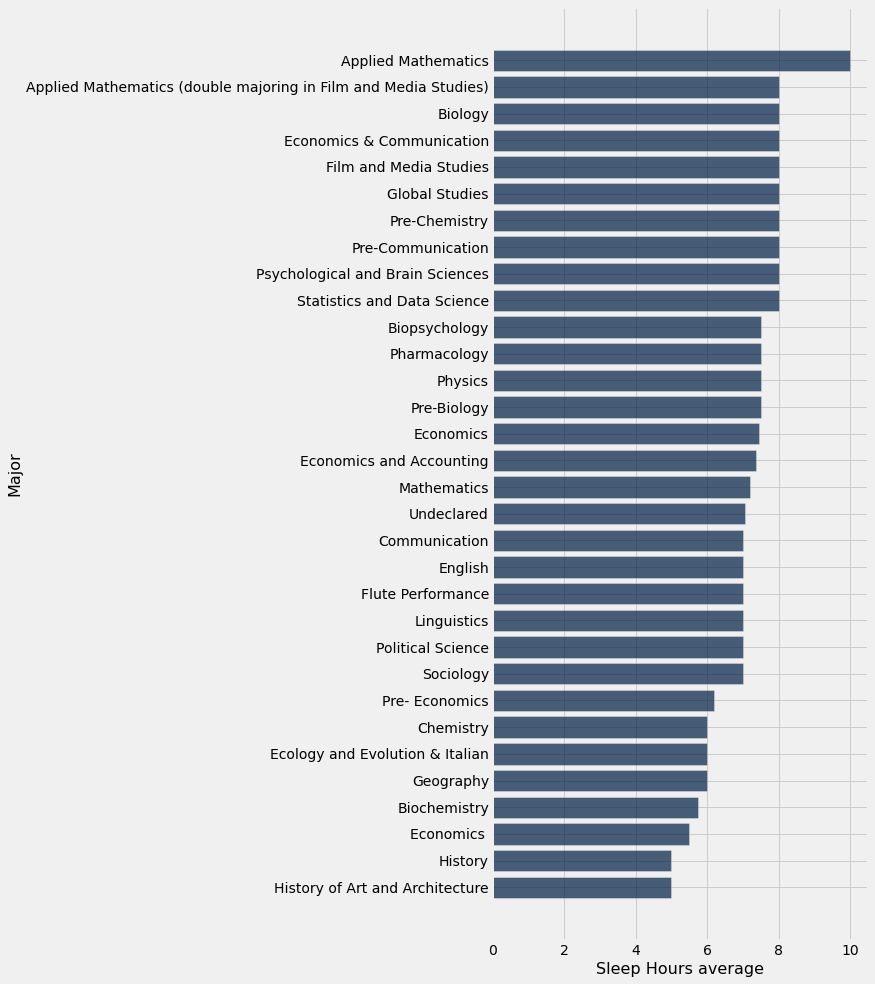

In [63]:
major_avg_tbl = class_cleaned.group('Major', np.average)
major_sleep_tbl = major_avg_tbl.select('Major', 'Sleep Hours average').sort('Sleep Hours average', descending = True)
major_sleep_tbl.barh('Major')

<!-- END QUESTION -->

In [64]:
# This data gives us a visual of the range of sleep hours that a student normally gets in a day based on their majors.
# The bar graph above tells us that students in Applied Mathematics gets the most sleep, while students in the 
# History of Art and Architecture and History get the least amount of sleep within our class data.

### Running a Hypothesis Test

Using the `class_data` data table, we want to explore how various student attributes are associated. What question do you want an answer to?

<!-- BEGIN QUESTION -->

**Question 5:** Set up a null hypothesis and an alternative hypothesis, describing the students of our CMPSC 5A class.
<!--
BEGIN QUESTION
name: q4_5
manual: true
-->

Null: Hours of exercise does not affect height, and the distance between average exercise hours are due to chance.

Alternate: As hours of exercise increases, height increases.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6:** State your test statistic. This would be a value (count, proportion, average, median, etc.) that would help you lean towards your viewpoint or the other (null or alternative). 

For example, high values of this test statistic would make you lean towards one viewpoint and low values of this test statistic would make you lean towards the other.

<!--
BEGIN QUESTION
name: q4_6
manual: true
-->

My test statistic will be the absolute distance between the average heights of those who go to the gym more than average and those who go to the gym less than average. 

In [65]:
def height_distance(tbl):
    height_cleaned = tbl.where('Height', are.above(10))
    hrs_avg = np.average(height_cleaned.column('Exercise Hours'))
    height_exercise_tbl = height_cleaned.select('Height', 'Exercise Hours')
    above_avg = height_exercise_tbl.where('Exercise Hours', are.above(hrs_avg))
    below_avg = height_exercise_tbl.where('Exercise Hours', are.below(hrs_avg))
    height_avg_above = np.average(above_avg.column('Height'))
    height_avg_below = np.average(below_avg.column('Height'))
    return abs(height_avg_above - height_avg_below)
height_distance(class_cleaned)

3.0467948717948588

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 7:** State the observed value of the test statistic. What is the actual value you observe in our `class_data` data table.

<!--
BEGIN QUESTION
name: q4_7
manual: true
-->

The observed value of the test statistic from our class_data table is 3.05. This is the absolute distance between the average heights of those who go to the gym more than average and those who go to the gym less than average.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 8:** Simulate a new CMPSC 5A course. You can do this by either sampling with replacement or use sample_proportions. What is the simulated test statistic? How does it compare with your observed statistic? 

Hint: refer to our lecture notebooks! 
<!--
BEGIN QUESTION
name: q4_8
manual: true
-->

The simulated test statistic is around the observed statistic. This points to an acception of the null; the small gap between the observed and simulated test statistic tells us that these observations are separate and due to chance. 

<!-- END QUESTION -->

In [66]:
def simulate_cs5a():
    return height_distance(class_cleaned.sample())

simulate_cs5a()

3.3630976430976318

<!-- BEGIN QUESTION -->

**Question 9:** Let's simulate our CMPSC 5A course, 5,000 times. We want to then collect all our 5,000 simulated test statistics in an array. 

<!--
BEGIN QUESTION
name: q4_9
manual: true
-->

In [67]:
height_simulation = make_array()
for i in np.arange(5000):
    height_simulation = np.append(height_simulation, simulate_cs5a())
height_simulation

array([ 1.6814951 ,  3.96222092,  3.09294947, ...,  2.48343672,
        2.28546691,  1.17621758])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 10:** Plot a histogram of your simulated values and your observed value.

<!--
BEGIN QUESTION
name: q4_10
manual: true
-->

<!-- END QUESTION -->

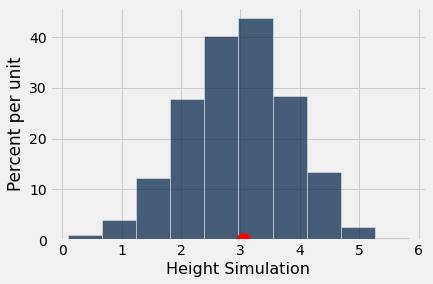

In [68]:
Table().with_column('Height Simulation', height_simulation).hist()
plots.scatter(height_distance(class_cleaned), 0, color='red', s=200);

<!-- BEGIN QUESTION -->

**Question 11:** By visually inspecting your histogram, were you able to simulate your observed value? Describe in detail what you see in your histogram.

<!--
BEGIN QUESTION
name: q4_11
manual: true
-->

Yes, the observed value was near the most frequent simulated values. This means that the null is accepted, as the observed value matches the typical values of a simulation. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 12:** Find your p-value and state whether it supports rejecting or accepting the null hypothesis. 

<!--
BEGIN QUESTION
name: q4_12
manual: true
-->

Our p-value tells us that about 46% of the distances found in our simulation are above the observed value. However, this also tells us that the other 54% of the distances are below the observed value. With this test statistic, we can assume that exercise neither increases nor decreases one's height.

<!-- END QUESTION -->

In [69]:
exercise_pval = (np.count_nonzero(height_simulation >= height_distance(class_cleaned)))/len(height_simulation)
exercise_pval

0.4724

<!-- BEGIN QUESTION -->

**Question 13:** Shortly summarize and interpret your results. After coming to a conclusion from your hypothesis testing, providing evidence for one viewpoint over the other, wWhat does this tell you about UCSB students who are taking CMPSC 5A this quarter?
 

<!--
BEGIN QUESTION
name: q4_13
manual: true
-->

I analyzed the 'Height' and 'Hours of Exercise' attributes from our class dataset to test whether Hours of Exercise had an effect on Height for those taking CMPSC5A this quarter. I found the average hours spent working out, then calculated the average heights of those exercising below and above average hours. This gave us two statistics to work with, allowing us to make comparisons with the difference between those numbers. I then created a simulation of our CMPSC5A data, ran it 5000 times to create an array of simulated distances between height. My test statistic showed that the observed value was near the most frequent simulated values, allowing us to accept the null. This tells us that within those in CMPSC5A this quarter, hours of exercise did not affect their heights and the two
attributes are not related.

<!-- END QUESTION -->



Congratulations! You have completed your Final Project! And conducted your own hypothesis test!

## Submit your Work

- **save the notebook** first (**`Save and Checkpoint`** from the `File` menu)
- go up to the `Kernel` menu and select `Restart & Clear Output` (make sure the notebook is saved first, because otherwise, you will lose all your work!). 
- go to `Cell -> Run All`. Carefully look through your notebook and verify that all computations execute correctly. You should see **no errors**; if there are any errors, make sure to correct them before you submit the notebook.
- <span style="color:red">The tests don't usually tell you that your answer is correct.</span> Take a look at the results that you are getting and verify that they match what is being asked and what you would expect to see.
* go to `File -> Download as -> Notebook` and download the notebook to your own computer. ([Please verify](https://ucsb-ds.github.io/ds1-f20/troubleshooting/#i-downloaded-the-notebook-file-but-it-saves-as-the-ipynbjson-extension-so-whenever-i-upload-it-to-gradescope-it-fails) that it got saved as an .ipynb file.)
* Upload the notebook to [Gradescope](https://www.gradescope.com/). You can drag and drop both files or hold down Ctrl to click on multiple files when you are uploading them.
* One submission per group. After you submit your notebook, you can Add Group Member. [How to Add Group Member in Gradescope](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members)


* Finally, remember to review the feedback you received for your Final Project Checkpoint. You can make any necessary corrections in this Full Submission of your Final Project, as we will check all questions in this notebook. 

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [70]:
grader.check_all()

q1_1 results: All test cases passed!

q1_3 results: All test cases passed!

q2_1_1 results: All test cases passed!

q2_1_2 results: All test cases passed!

q2_1_3 results: All test cases passed!

q2_1_6 results: All test cases passed!

q2_2_3 results: All test cases passed!

q2_2_4 results: All test cases passed!

q2_2_5 results: All test cases passed!

q2_2_7 results: All test cases passed!

q3_1_1 results: All test cases passed!

q3_1_2 results: All test cases passed!

q3_1_3 results: All test cases passed!

q3_1_4 results: All test cases passed!

q3_1_5 results: All test cases passed!

q3_2_1 results: All test cases passed!

q3_2_2 results: All test cases passed!

q3_2_3 results: All test cases passed!

q3_2_4 results: All test cases passed!